# Point Kinetics with one family of precursors

We look at the system of two equations:
$$ \frac{dn}{dt} = - \frac{\beta - \rho}{\ell} n(t) + \lambda C(t) $$
$$ \frac{dC}{dt} = \frac{\beta}{\ell} n(t) - \lambda C(t) $$

We look for solutions of the form $ n(t) = a e^{\omega t}$ and $ C(t) = b e^{\omega t} $.
The caracteristic equation for $\omega$ is given by
$$ \omega^2 + \left( \lambda + \frac{\beta - \rho}{\ell} \right) \omega
- \frac{\rho \lambda}{\ell} = 0 $$

The full solution is then given by:
$$ n(t) = n_0 \left( a_1 e^{\omega_1 t} + a_2 e^{\omega_2 t} \right) $$
$$ C(t) = C_0 \left( b_1 e^{\omega_1 t} + b_2 e^{\omega_2 t} \right) $$

In order to find the four constants $a_1, $a_2$, $b_1$, and $b_2$ we have the two initial conditions $n(0) = n_0$ and $C(0) = C_0$.
Two more conditions are found by evaluating the solution at $t=0^+$ and demanding continuity for $n$ and $C$ at $t=0$.
At the end of the calculation we obtain:
$$ a_1 = \frac{\rho/\ell - \omega_2}{\omega_1 - \omega_2}  $$
$$ a_2 =  \frac{\omega_1 - \rho/\ell}{\omega_1 - \omega_2} $$
$$ b_1 = - \frac{\omega_2}{\omega_1 - \omega_2} $$
$$ b_2 =  \frac{\omega_1}{\omega_1 - \omega_2} $$


In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def find_roots(rho, beta, lambd, el):
    b = lambd + (beta - rho) / el
    c = - rho*lambd/el
    delta = np.sqrt(b*b - 4*c)
    w1 = 0.5*(-b + delta)
    w2 = 0.5*(-b - delta)
    return w1, w2

In [28]:
def equilib(n0, beta, lambd, el):
    return n0*beta/el/lambd

In [29]:
from math import exp
def solve_insertion(rho, times, init, beta, lambd, el, nbt=100):
    beta = beta*1.e-5
    rho = rho*1.e-5
    w1, w2 = find_roots(rho, beta, lambd, el)
    a1 =  (rho/el - w2) /(w1-w2)
    a2 = (w1 - rho/el) /(w1-w2)
    b1 = - w2 /(w1-w2)
    b2 = w1 /(w1-w2)
    t0, t1 = times
    n0, c0 = init
    txs = [(t1-t0)/nbt*i for i in range(nbt+1)]
    ntx = [n0*(a1*exp(w1*t)+a2*exp(w2*t)) for t in txs]
    ctx = [c0*(b1*exp(w1*t)+b2*exp(w2*t)) for t in txs]
    txs1 = [t0+t for t in txs]
    return txs1, ntx, ctx

## Reactivity insertion

In [30]:
def plot_insertion(times, nxs, cxs):
    fig, [ax0, ax1] = plt.subplots(2,1, sharex=True)
    ax0.plot(times, nxs)
    ax1.plot(times, cxs, color="tab:orange")
    ax0.set_ylabel("n(t)")
    ax1.set_xlabel("time [s]")
    ax1.set_ylabel("C(t)")
    ax0.grid()
    ax1.grid()
    plt.tight_layout()
    plt.draw()

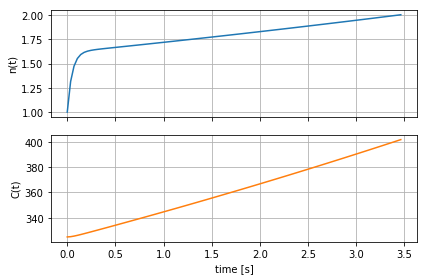

In [39]:
el = 2.e-4
lam = 0.1
beta = 650
rho = +250

n0 = 1
C0 = equilib(n0, beta*1.e-5, lam, el)
times, ns, Cs = solve_insertion(rho, (0,3.5), (n0,C0), beta, lam, el)
plot_insertion(times, ns, Cs)




## Successive step insertions

In [40]:
def multi_steps(insertion_list, beta, lam, el):
    n0 = 1
    c0 = equilib(n0, beta*1.e-5, lam, el)
    t0 = 0.
    times = []
    nxs = []
    cxs = []
    for rho, time in insertion_list:
        t1 = t0+time
        times_inc, ns_inc, cs_inc = solve_insertion(rho, (t0, t1), (n0,c0), beta, lam, el)
        times += times_inc
        nxs += ns_inc
        cxs += cs_inc
        t0 = times[-1]
        n0 = nxs[-1]
        c0 = cxs[-1]
    return times, nxs, cxs
        


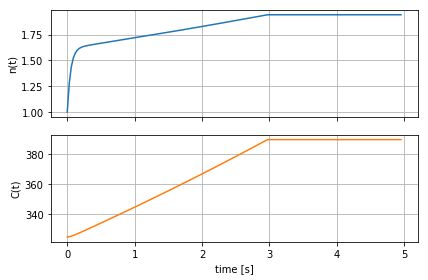

In [41]:
el = 2.e-4
lam = 0.1
beta = 650
steps = [(250, 3), (0., 2)]
times, ns, Cs = multi_steps(steps, beta, lam, el)
plot_insertion(times, ns, Cs)

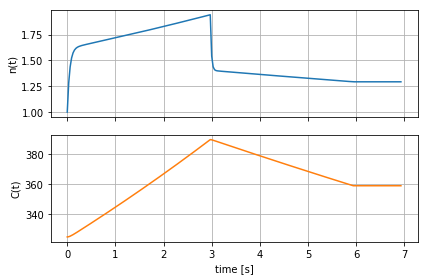

In [42]:

steps = [(250, 3), (-250, 3), (0, 1)]
times, ns, Cs = multi_steps(steps, beta, lam, el)
plot_insertion(times, ns, Cs)